In [2]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
alumni = 'https://raw.githubusercontent.com/Africa-Data-School/ADS-Assignment-1/main/alumni.csv'
df = pd.read_csv(alumni)
df

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


In [38]:
df.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [4]:
df.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [8]:
df.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [10]:
df.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


In [12]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))
clean_currency("$66,000")

66000.0

In [22]:
df.dtypes.savings

AttributeError: 'Series' object has no attribute 'savings'

In [23]:
df.value_counts("Gender")

Gender
Male      46
Female    39
M          3
dtype: int64

In [42]:
df.replace({'Gender': '^M.$'}, {'Gender': 'Male'}, regex=True)

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


In [47]:
df.loc[df["Gender"] == 'M', 'Gender']='Male'
df

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"
...,...,...,...,...,...,...,...,...
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,Male,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"


In [48]:
df.value_counts("Gender")

Gender
Male      49
Female    39
dtype: int64

In [50]:
df.groupby(['Salary']).mean()

,Year Graduated,Fee
Salary,,
35000,2005.000000,11691.000000
40000,2007.000000,12717.000000
60000,2006.000000,11390.750000
65000,2006.846154,11726.000000
70000,2006.000000,10869.000000
75000,2007.153846,11598.846154
85000,2006.250000,11469.250000
90000,2006.000000,11716.571429
95000,2005.333333,11875.000000


In [51]:
df.groupby(['Salary']).median()

,Year Graduated,Fee
Salary,,
35000,2005.0,11691.0
40000,2007.0,12717.0
60000,2006.0,11327.5
65000,2007.0,11700.0
70000,2006.0,10869.0
75000,2007.0,11699.0
85000,2006.5,11514.0
90000,2005.0,11696.0
95000,2006.0,11948.0


In [55]:
df.groupby(['Salary']).std()

,Year Graduated,Fee
Salary,,
35000,NaN,NaN
40000,NaN,NaN
60000,1.154701,507.035420
65000,1.463224,407.573715
70000,NaN,NaN
75000,1.541228,434.281631
85000,1.669046,390.243788
90000,1.664101,472.878536
95000,1.154701,880.771821


In [70]:
df_greater=df['Fee']> 15000
filtered_df = df[df_greater]
print(filtered_df)

    Year Graduated Gender Marital Status      Diploma Type Defaulted  Salary  \
18            2006   Male        Married  Standard Diploma        No  140000   

      Fee Savings ($)  
18  20960     $72,000  


Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

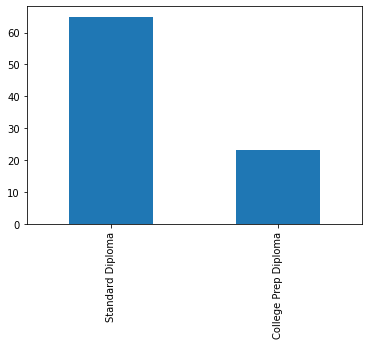

In [71]:
df["Diploma Type"].value_counts().plot(kind='bar')

In [146]:

df.(columns['Savings', 'Salary']).plot(kind=box)

SyntaxError: invalid syntax (<ipython-input-146-3464306478c2>, line 1)

<AxesSubplot:ylabel='Frequency'>

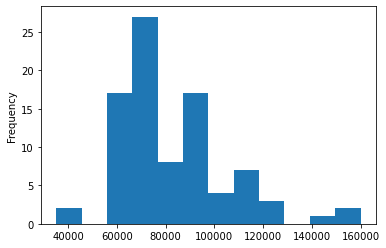

In [82]:
df['Salary'].plot(kind ='hist', bins =12)

<AxesSubplot:xlabel='Savings', ylabel='Salary'>

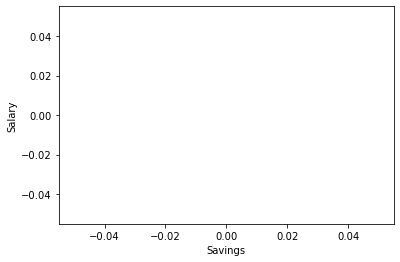

In [148]:
df.plot.scatter(x='Savings',
                y='Salary')


In [155]:

cont= df.crosstab([df.colnames=['Martial Status', "Default"])
print(cont)


SyntaxError: invalid syntax (<ipython-input-155-d8d6e2598958>, line 1)